<a href="https://colab.research.google.com/github/Coralain10/ML_Archaeological-Objects-Reconstruction/blob/main/Preparaci%C3%B3n_de_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binvox como Array 3D Booleano

In [69]:
import numpy as np

In [70]:
class Voxels(object):
  def __init__(self, data, dims, translate, scale, axis_order):
    self.data = data
    self.dims = dims
    self.translate = translate
    self.scale = scale
    assert (axis_order in ('xzy', 'xyz'))
    self.axis_order = axis_order

  def clone(self):
    data = self.data.copy()
    dims = self.dims[:]
    translate = self.translate[:]
    return Voxels(data, dims, translate, self.scale, self.axis_order)

  # def write(self, fp):
  #   write(self, fp)

In [71]:
def read_header(fp):
  line = fp.readline().strip()
  if not line.startswith(b'#binvox'):
    raise IOError('Not a binvox file')
  dims = list(map(int, fp.readline().strip().split(b' ')[1:]))
  translate = list(map(float, fp.readline().strip().split(b' ')[1:]))
  scale = list(map(float, fp.readline().strip().split(b' ')[1:]))[0]
  line = fp.readline()
  return dims, translate, scale

In [127]:
def read_as_3d_array(fp, fix_coords=True):
  dims, translate, scale = read_header(fp)
  raw_data = np.frombuffer(fp.read(), dtype=np.uint8)
  values, counts = raw_data[::2], raw_data[1::2]
  data = np.repeat(values, counts).astype(bool)
  data = data.reshape(dims)
  if fix_coords:
    # xzy to xyz
    data = np.transpose(data, (0, 2, 1))
    axis_order = 'xyz'
  else:
    axis_order = 'xzy'
  return Voxels(data, dims, translate, scale, axis_order)

# Convirtiendo el objeto a Binvox

In [73]:
#!unzip name.zip

In [74]:
!wget https://www.patrickmin.com/binvox/linux64/binvox?rnd=1668716356580525 -O binvox
!chmod 755 binvox

--2022-11-17 23:10:42--  https://www.patrickmin.com/binvox/linux64/binvox?rnd=1668716356580525
Resolving www.patrickmin.com (www.patrickmin.com)... 139.162.224.231
Connecting to www.patrickmin.com (www.patrickmin.com)|139.162.224.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523488 (1.5M)
Saving to: ‘binvox’

binvox              100%[===================>]   1.45M  1.62MB/s    in 0.9s    

2022-11-17 23:10:43 (1.62 MB/s) - ‘binvox’ saved [1523488/1523488]



In [75]:
# !pip install binvox

In [76]:
!wget https://github.com/Coralain10/ML_Archaeological-Objects-Reconstruction/raw/main/data/broken_chair.stl

--2022-11-17 23:10:44--  https://github.com/Coralain10/ML_Archaeological-Objects-Reconstruction/raw/main/data/broken_chair.stl
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Coralain10/ML_Archaeological-Objects-Reconstruction/main/data/broken_chair.stl [following]
--2022-11-17 23:10:44--  https://raw.githubusercontent.com/Coralain10/ML_Archaeological-Objects-Reconstruction/main/data/broken_chair.stl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769384 (751K) [application/octet-stream]
Saving to: ‘broken_chair.stl.1’

broken_chair.stl.1  100%[===================>] 751.35K  --.-KB/s    in 0

In [77]:
import os

In [153]:
def voxels_from_file(file, voxsize=32):
  out_file = file.split('.')[0] + '.binvox'
  file = file.replace(' ', '\ ')
  cmd = f'/content/binvox -d {voxsize} -cb -e /content/{file}'
  # !/content/binvox -d 32 -cb -e /content/broken_chair.stl

  if os.path.exists(out_file):
    os.remove(out_file)

  # os.system('chmod 755 binvox')
  t = os.system(cmd)

  if t == 0:
    with open(out_file, 'rb') as f:
      d = read_as_3d_array(f, False).data
      d = np.transpose(d, (0, 2, 1)) # fix orientation

    # os.remove(out_file)
    return 1, d, file.split('/')[-1]
  else:
    return 0, None, None

In [154]:
success, array, filename = voxels_from_file("broken_chair.stl") #silla_rota.obj

In [80]:
import matplotlib.pyplot as plt

In [152]:
def bbvox_points(obj):
  points = []
  for z in range(32):
    for y in range(32):
      for x in range(32):
        if obj[z,x,y]:
          points += [ (x,y,z) ]
  return np.array(points)

def show3D(points):
  plt.subplots(figsize=(12,12))
  ax = plt.subplot( projection='3d' )
  ax.scatter3D(points[:,0], points[:,1], points[:,2],c='black')

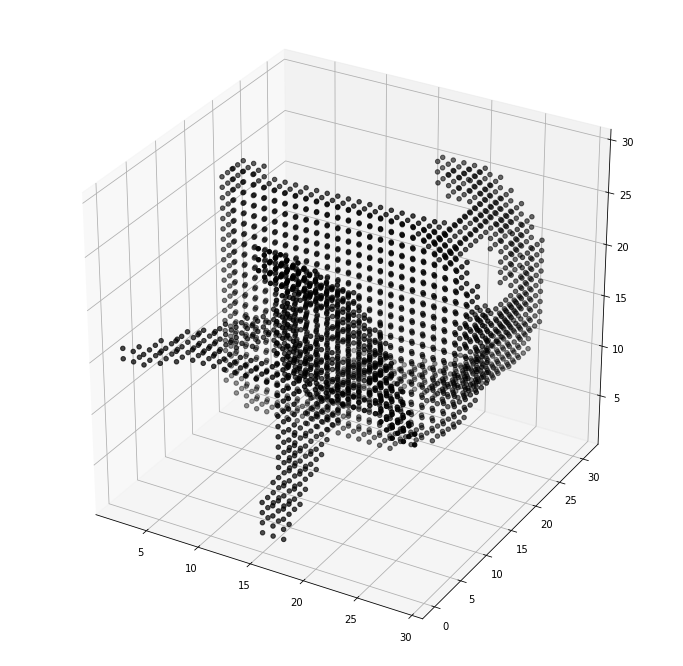

In [155]:
if success: show3D( bbvox_points(array) )